This project aims to measure the efficacy of a golf stat-tracking app’s premium feature bundle on players’ average to par score. The dataset contains two-third untreated observations in the control group where players never had access to the premium features and one-third treated observations in the treatment group where players adopted premium features. There are five different metrics that are measuring golfers’ performance and our dependent variable is the average score to par. The data is collected in two different phases; each metric mentioned above is collected in two segments for before and after time periods from the introduction of premium features. Each segment is an average of the five metrics across three rounds of golf.

I will be measuring the difference in difference effects using switching equation, linear regression, and ridge regression to measure the causal effect of the app's premium feature on players' performance. In addition, I will be implementing propensity score matching method to alleviate the effects of selection bias from the observational dataset and utilize the matched control group to measure the causal effect of the app's premium feature on players' performance. Finally, I will be implementing gridsearch cross validation method with hyperparameter tuning to determine the best hyperparameter random forest model that can predict a player's average score to par.

In [122]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [123]:
df_treat = pd.read_csv('before-premium-after.csv')

df_control = pd.read_csv('never-premium.csv')

In [124]:
df_treat

,avgBeforeToPar,avgBeforeFairwayHits,avgBeforeGir,avgBeforePuttsPerHole,avgBeforeUpAndDownPercentage,avgAfterToPar,avgAfterFairwayHits,avgAfterGir,avgAfterPuttsPerHole,avgAfterUpAndDownPercentage
0,16.000000,9.666667,6.000000,1.851852,35.269360,11.000000,9.000000,8.000000,1.851852,33.333333
1,22.633333,4.866667,3.966667,2.024074,19.289100,22.000000,4.333333,4.000000,2.037037,23.333333
2,4.000000,6.333333,9.666667,1.740741,35.185185,1.666667,6.000000,9.666667,1.648148,81.944444
3,26.666667,5.666667,2.000000,2.055556,26.785714,23.666667,4.333333,4.333333,2.296296,31.746032
4,1.333333,10.666667,13.000000,1.851852,36.666667,6.366667,8.700000,9.633333,1.842593,33.965127
...,...,...,...,...,...,...,...,...,...,...
3745,15.666667,5.666667,6.000000,1.722222,56.944444,14.666667,7.333333,6.666667,1.870370,33.968254
3746,4.666667,10.000000,12.000000,1.925926,57.777778,9.000000,7.000000,8.000000,1.944444,55.555556
3747,19.266667,5.100000,3.866667,1.855556,36.617484,20.000000,4.666667,2.000000,1.944444,19.358974
3748,17.034977,6.708441,5.612285,1.917892,29.711762,16.874956,6.706252,5.622773,1.913804,30.050701


In [125]:
df_control

,avgToPar,avgFairwayHits,avgGir,avgPuttsPerHole,avgUpAndDownPercentage,avgToPar2,avgFairwayHits2,avgGir2,avgPuttsPerHole2,avgUpAndDownPercentage2
0,30.786119,6.164969,5.495963,2.031171,7.780309,16.551000,7.278885,1.699729,1.995807,1.608290
1,20.406019,9.503481,1.015404,2.152677,38.892446,15.525798,10.322531,7.827891,1.996047,20.086854
2,17.795773,8.552207,3.479664,1.959909,30.864943,13.149984,6.259431,2.560090,1.935239,59.605147
3,2.749096,10.512863,-0.040590,2.075819,51.344124,21.084022,7.210028,7.778005,2.164723,62.832529
4,14.925485,5.859756,8.468489,1.737422,21.577995,10.642227,5.583423,7.466623,1.877151,27.212341
...,...,...,...,...,...,...,...,...,...,...
4995,18.538294,4.704053,5.884815,1.918297,16.608961,12.316999,6.009865,-2.198725,1.800480,49.769967
4996,18.584311,4.635080,6.024391,2.127935,55.261140,19.113240,7.454189,-0.341252,1.961949,8.760451
4997,15.327074,8.245314,4.906553,1.858495,5.287300,3.610886,10.522708,3.944346,1.949888,1.058434
4998,23.421126,5.775508,4.060859,2.005459,-17.353180,14.610937,7.071344,2.099121,2.187803,17.940631


There are 3750 treated observations, our treatment group, and there are 5000 untreated observations, our control group. There are 8750 total observations in this dataset.

In [126]:
df_control.columns = ['avgToParbefore',	'avgFairwayHitsbefore', 'avgGirbefore',	'avgPuttsPerHolebefore',	'avgUpAndDownPercentagebefore',	'avgToParafter',	'avgFairwayHitsafter',	'avgGirafter',	'avgPuttsPerHoleafter',	'avgUpAndDownPercentageafter']
df_treat.columns = ['avgToParbefore',	'avgFairwayHitsbefore', 'avgGirbefore',	'avgPuttsPerHolebefore',	'avgUpAndDownPercentagebefore',	'avgToParafter',	'avgFairwayHitsafter',	'avgGirafter',	'avgPuttsPerHoleafter',	'avgUpAndDownPercentageafter']

In [127]:
df_treat['treatment'] = 1
df_control['treatment'] = 0

In [128]:
df = pd.concat([df_treat, df_control], ignore_index = True)
df

,avgToParbefore,avgFairwayHitsbefore,avgGirbefore,avgPuttsPerHolebefore,avgUpAndDownPercentagebefore,avgToParafter,avgFairwayHitsafter,avgGirafter,avgPuttsPerHoleafter,avgUpAndDownPercentageafter,treatment
0,16.000000,9.666667,6.000000,1.851852,35.269360,11.000000,9.000000,8.000000,1.851852,33.333333,1
1,22.633333,4.866667,3.966667,2.024074,19.289100,22.000000,4.333333,4.000000,2.037037,23.333333,1
2,4.000000,6.333333,9.666667,1.740741,35.185185,1.666667,6.000000,9.666667,1.648148,81.944444,1
3,26.666667,5.666667,2.000000,2.055556,26.785714,23.666667,4.333333,4.333333,2.296296,31.746032,1
4,1.333333,10.666667,13.000000,1.851852,36.666667,6.366667,8.700000,9.633333,1.842593,33.965127,1
...,...,...,...,...,...,...,...,...,...,...,...
8745,18.538294,4.704053,5.884815,1.918297,16.608961,12.316999,6.009865,-2.198725,1.800480,49.769967,0
8746,18.584311,4.635080,6.024391,2.127935,55.261140,19.113240,7.454189,-0.341252,1.961949,8.760451,0
8747,15.327074,8.245314,4.906553,1.858495,5.287300,3.610886,10.522708,3.944346,1.949888,1.058434,0
8748,23.421126,5.775508,4.060859,2.005459,-17.353180,14.610937,7.071344,2.099121,2.187803,17.940631,0


Dataset is combined for future data analysis processes.

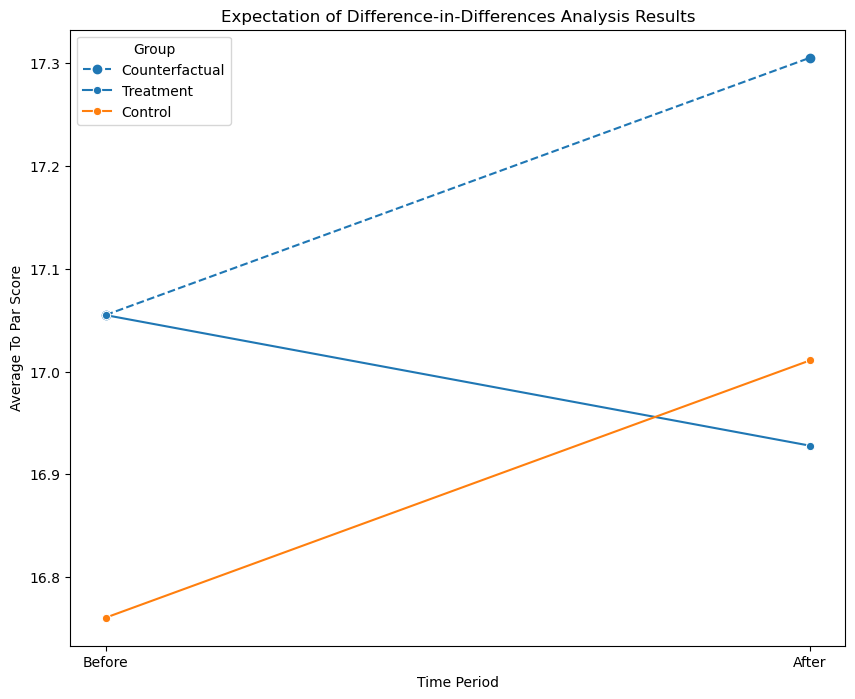

In [129]:
avg_before_treatment = df[df['treatment'] == 1]['avgToParbefore'].mean()
avg_after_treatment = df[df['treatment'] == 1]['avgToParafter'].mean()
avg_before_control = df[df['treatment'] == 0]['avgToParbefore'].mean()
avg_after_control = df[df['treatment'] == 0]['avgToParafter'].mean()

plot_data = {
    'Group': ['Treatment', 'Treatment', 'Control', 'Control'],
    'Time Period': ['Before', 'After', 'Before', 'After'],
    'Average To Par': [avg_before_treatment, avg_after_treatment, avg_before_control, avg_after_control]
}

plot_df = pd.DataFrame(plot_data)

counterfactual_trend = avg_after_control - avg_before_control
counterfactual_after_treatment = avg_before_treatment + counterfactual_trend


plt.figure(figsize = (10, 8))

plt.plot(['Before', 'After'], [avg_before_treatment, counterfactual_after_treatment], label = 'Counterfactual', linestyle = '--', marker = 'o')

sns.lineplot(x = 'Time Period', y = 'Average To Par', hue = 'Group', data = plot_df, marker = 'o')

plt.title('Expectation of Difference-in-Differences Analysis Results')
plt.xlabel('Time Period')
plt.ylabel('Average To Par Score')
plt.xticks(['Before', 'After'])
plt.show()

The graph above illustrates the expected outcome of a successful difference-in-dfference effect where the treatment and control groups' average score to par increase over time with the same parallel trend, but the actual average score to par of the treatment group is decreasing due to the uptake of premium feature.

In [130]:
#differences from before and after

df_diff = pd.DataFrame()

df_diff['diff_hdc'] = -1 * (df['avgToParafter'] - df['avgToParbefore'])

df_diff['diff_fwh'] = df['avgFairwayHitsafter'] - df['avgFairwayHitsbefore']

df_diff['diff_gir'] = df['avgGirafter'] - df['avgGirbefore']

df_diff['diff_pph'] = -1 * (df['avgPuttsPerHoleafter'] - df['avgPuttsPerHolebefore'])

df_diff['diff_und'] = df['avgUpAndDownPercentageafter'] - df['avgUpAndDownPercentagebefore']

df_diff['treatment'] = df['treatment']

In [131]:
df_diff

,diff_hdc,diff_fwh,diff_gir,diff_pph,diff_und,treatment
0,5.000000,-0.666667,2.000000,-0.000000,-1.936027,1
1,0.633333,-0.533333,0.033333,-0.012963,4.044234,1
2,2.333333,-0.333333,0.000000,0.092593,46.759259,1
3,3.000000,-1.333333,2.333333,-0.240741,4.960317,1
4,-5.033333,-1.966667,-3.366667,0.009259,-2.701539,1
...,...,...,...,...,...,...
8745,6.221295,1.305812,-8.083540,0.117817,33.161006,0
8746,-0.528929,2.819108,-6.365644,0.165986,-46.500689,0
8747,11.716188,2.277394,-0.962206,-0.091393,-4.228866,0
8748,8.810188,1.295836,-1.961737,-0.182344,35.293811,0


The dataframe above is showcasing the difference amongst the five metrics between the before and after time period. The difference equations above has been set up with an inverse on relevant metrics so that all positive numbers correlates with improvement.

In [132]:
df_diff['improved'] = (df_diff['diff_hdc'] > 0).astype(int)

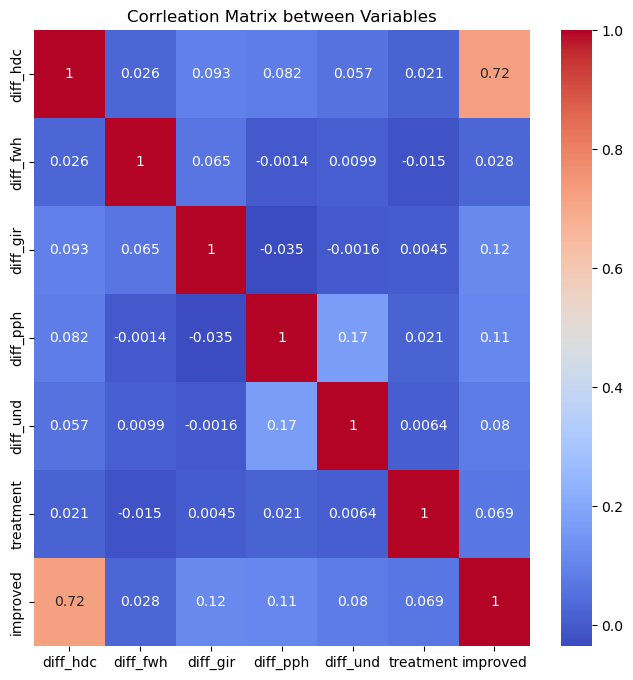

In [133]:
plt.figure(figsize = (8,8))
sns.heatmap(df_diff.corr(), annot = True, cmap = 'coolwarm')

plt.title('Corrleation Matrix between Variables')
plt.show()

This correlation matrix heatmap is used to visualize the correlation between each variable in the dataset. As illustrated above, difference in GIR and putts per hole metrics are the two most correlated variables with improvement in a player's average score to par.

## Difference-in-Difference using Switching Equation

In [134]:
treated_mean = df_diff[df_diff['treatment'] == 1].mean()

control_mean = df_diff[df_diff['treatment'] == 0].mean()

did_estimator = treated_mean - control_mean

print('treated group change in handicap:', treated_mean['diff_hdc'])

print('control group change in handicap:', control_mean['diff_hdc'])

print('DiD estimator:', did_estimator['diff_hdc'])

treated group change in handicap: 0.12714027324789992
control group change in handicap: -0.2504811302067484
DiD estimator: 0.37762140345464834


Treatment, uptake of the premium feature, improved a player's handicap by 0.378 strokes.

In [135]:
did_estimator

diff_hdc     0.377621
diff_fwh    -0.078841
diff_gir     0.027167
diff_pph     0.008114
diff_und     0.270507
treatment    1.000000
improved     0.070067
dtype: float64

Above is the difference between the mean of each variable from before and after period. Positive number shows improvement and we can see that only the fairway hits metric is negatively impacted by the introduction of the premium feature.

## Thin Data Gen

In [136]:
columns_before = ['avgToParbefore', 'avgFairwayHitsbefore', 'avgGirbefore', 'avgPuttsPerHolebefore', 'avgUpAndDownPercentagebefore']
columns_after = ['avgToParafter', 'avgFairwayHitsafter', 'avgGirafter', 'avgPuttsPerHoleafter', 'avgUpAndDownPercentageafter']

df_before = df[['treatment'] + columns_before].copy()
df_after = df[['treatment'] + columns_after].copy()

df_before.columns = ['treatment'] + [col.replace('before', '') for col in columns_before]
df_after.columns = ['treatment'] + [col.replace('after', '') for col in columns_after]

df_before['time_dummy'] = 0  # 0 for 'before'
df_after['time_dummy'] = 1   # 1 for 'after'

thin_df = pd.concat([df_before, df_after])

thin_df

,treatment,avgToPar,avgFairwayHits,avgGir,avgPuttsPerHole,avgUpAndDownPercentage,time_dummy
0,1,16.000000,9.666667,6.000000,1.851852,35.269360,0
1,1,22.633333,4.866667,3.966667,2.024074,19.289100,0
2,1,4.000000,6.333333,9.666667,1.740741,35.185185,0
3,1,26.666667,5.666667,2.000000,2.055556,26.785714,0
4,1,1.333333,10.666667,13.000000,1.851852,36.666667,0
...,...,...,...,...,...,...,...
8745,0,12.316999,6.009865,-2.198725,1.800480,49.769967,1
8746,0,19.113240,7.454189,-0.341252,1.961949,8.760451,1
8747,0,3.610886,10.522708,3.944346,1.949888,1.058434,1
8748,0,14.610937,7.071344,2.099121,2.187803,17.940631,1


Dataset is broken down with the time_dummy variable to differentiate between the before and after introduction of treatment time periods. The number of observations doubled as each observation is spilt into two based on their before and after time_dummy classification.

## Difference-in-Difference Analysis using Linear Regression

In [137]:
thin_df['interaction'] = thin_df['time_dummy'] * thin_df['treatment']

In [138]:
import statsmodels.api as sm

X1 = thin_df.drop(['avgToPar'], axis = 1)
X1 = sm.add_constant(X1)

y1 = thin_df['avgToPar']

ols1 = sm.OLS(y1, X1).fit(cov_type = 'HC3')

print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:               avgToPar   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     425.1
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:38:15   Log-Likelihood:                -58514.
No. Observations:               17500   AIC:                         1.170e+05
Df Residuals:                   17492   BIC:                         1.171e+05
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6

In terms of golf, the lower the average score to par the more improvment is seen in the golfers. Treatment variable is significant at 10% significance level, and treatment is increase a player's average to par (not improving player's average score to par). All the control variables (fairwayhits, GIR, PPH, UnD percent) are statiscally significant. The results are as follows: every unit increase in average fairway hit will improve a player's average score to par by .296 units; every unit increase in GIR will improve a player's average score to par by .861 units; every unit increase in putts per hole will worsen a player's average score to par by 9.642 units; every unit increase in up and down percent will improve a player's average score to par by .0521 units.

The most important variable in this linear regression for the difference-in-difference analysis is the interaction variable. The interaction variable is not statistically significant at normal standards.

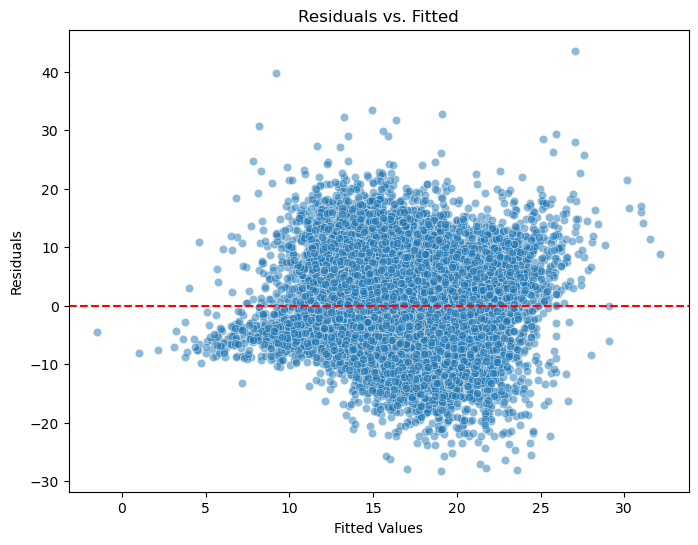

In [139]:
fitted_vals = ols1.predict()
residuals = ols1.resid

plt.figure(figsize=(8, 6))
sns.scatterplot(x = fitted_vals, y = residuals, alpha = 0.5)
plt.axhline(y = 0, linestyle = '--', color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

Above is a visualization of fitted values and residuals via a scatter plot showing the distribution of the values have no heteroskadascity.

## Ridge Regression

In [140]:
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error, r2_score

ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(X1, y1)

print(f"Intercept: {ridge_model.intercept_}")

print("Coefficients:")
for feature, coef in zip(X1.columns, ridge_model.coef_):
    print(f"{feature}: {coef}")

Intercept: 6.724399891923545
Coefficients:
const: 0.0
treatment: 0.23459150547692156
avgFairwayHits: -0.29606049132611695
avgGir: -0.8610806429529928
avgPuttsPerHole: 9.617624260539912
avgUpAndDownPercentage: -0.05216788530328684
time_dummy: 0.21117135613691848
interaction: -0.28496250230853565


In [141]:
predictions1 = ridge_model.predict(X1)

mse1 = mean_squared_error(y1, predictions1)
rsq1 = r2_score(y1, predictions1)

print("Mean Squared Error:", mse1)
print("R-squared:", rsq1)

Mean Squared Error: 46.9682138035286
R-squared: 0.184426547536359


Above analysis is the Ridge regression used to confirm the findings from the linear regression using OLS method with stricter penalties on highly correlated varibles to address multicolinearity issues. The results from ridge regression are similar to that of the linear regression results from OLS.

## Propensity Score Matching

I will be creating a synthetic control group via the propensity score matching method to address the potential selection bias in this observational dataset. Propensity score mathcing will be completed using logistic regression for calculating propensity score and KNN nearest neighbor for matching to derive the matched control group.

In [142]:
psm_df = thin_df.copy()

psm_df = psm_df.drop(['interaction'], axis = 1)

In [143]:
from sklearn.linear_model import LogisticRegression

covariates = psm_df.drop(['treatment', 'avgToPar'], axis = 1)

logit = LogisticRegression()

logit.fit(covariates, psm_df['treatment'])

psm_df['propensity_score'] = logit.predict_proba(covariates)[:,1]

psm_df

,treatment,avgToPar,avgFairwayHits,avgGir,avgPuttsPerHole,avgUpAndDownPercentage,time_dummy,propensity_score
0,1,16.000000,9.666667,6.000000,1.851852,35.269360,0,0.429168
1,1,22.633333,4.866667,3.966667,2.024074,19.289100,0,0.428902
2,1,4.000000,6.333333,9.666667,1.740741,35.185185,0,0.424547
3,1,26.666667,5.666667,2.000000,2.055556,26.785714,0,0.432874
4,1,1.333333,10.666667,13.000000,1.851852,36.666667,0,0.417346
...,...,...,...,...,...,...,...,...
8745,0,12.316999,6.009865,-2.198725,1.800480,49.769967,1,0.446278
8746,0,19.113240,7.454189,-0.341252,1.961949,8.760451,1,0.435210
8747,0,3.610886,10.522708,3.944346,1.949888,1.058434,1,0.426602
8748,0,14.610937,7.071344,2.099121,2.187803,17.940631,1,0.429755


Using logistic regression to calculate propensity score of each observation that it could be in the treatment group.

In [144]:
from sklearn.neighbors import NearestNeighbors

treated = psm_df[psm_df['treatment'] == 1]
control = psm_df[psm_df['treatment'] == 0]

nn = NearestNeighbors(n_neighbors = 1, algorithm = 'ball_tree')

nn.fit(control[['propensity_score']])

distances, indices = nn.kneighbors(treated[['propensity_score']])

matched_pairs = treated.copy()
matched_pairs['match_index'] = indices.flatten()
matched_pairs['distance'] = distances.flatten()

matched_control = control.iloc[matched_pairs['match_index']].reset_index()

matched_control

,index,treatment,avgToPar,avgFairwayHits,avgGir,avgPuttsPerHole,avgUpAndDownPercentage,time_dummy,propensity_score
0,7329,0,5.272256,5.532366,3.949845,1.962939,16.462520,0,0.429167
1,7182,0,2.654168,7.068893,7.417849,1.596918,27.645652,0,0.428902
2,7358,0,22.339880,8.091625,5.773774,1.869821,0.122353,0,0.424550
3,8135,0,15.115370,10.654238,2.659754,1.971976,31.776510,1,0.432873
4,6779,0,11.677143,8.084033,10.350668,2.151962,27.392675,1,0.417349
...,...,...,...,...,...,...,...,...,...
7495,5976,0,12.579701,7.893632,4.786461,1.872131,11.768846,0,0.427872
7496,4106,0,6.973908,6.348025,6.705010,1.803143,27.855501,1,0.427827
7497,4320,0,8.714269,5.493414,3.667747,1.927079,38.685735,1,0.433207
7498,4727,0,14.837995,6.057867,4.623386,1.746018,3.680504,0,0.428665


Using KNN nearest neighbor method to find the matched control group to create a synthetic control group for further data analysis.

In [145]:
treated = treated.reset_index(drop = True)
control = control.reset_index(drop = True)

/var/folders/z9/z86qry_94853pn_mr38st7n80000gn/T/ipykernel_70765/3874237700.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(treated['propensity_score'], label = 'Treated', shade = True)
/var/folders/z9/z86qry_94853pn_mr38st7n80000gn/T/ipykernel_70765/3874237700.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(control['propensity_score'], label = 'Control', shade = True)


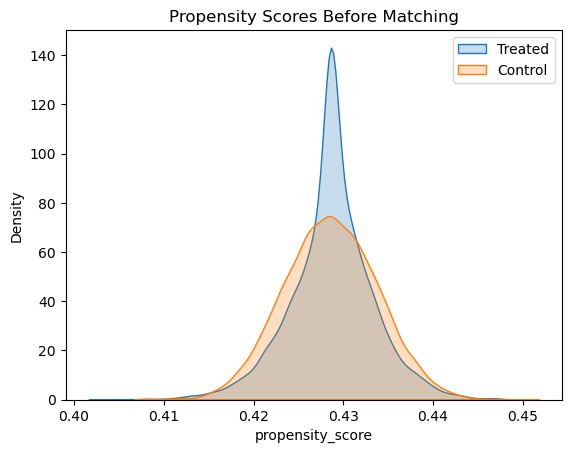

In [146]:
sns.kdeplot(treated['propensity_score'], label = 'Treated', shade = True)
sns.kdeplot(control['propensity_score'], label = 'Control', shade = True)
plt.title('Propensity Scores Before Matching')
plt.legend()
plt.show()

Above graph shows the propensity score between treated and control group before matching has occured. We can see that they are not matched based on propensity score yet.

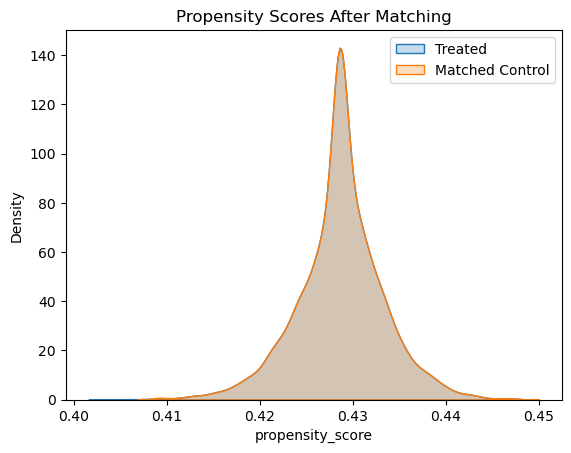

In [147]:
sns.kdeplot(treated['propensity_score'], label = 'Treated', fill = True)
sns.kdeplot(matched_control['propensity_score'], label = 'Matched Control', fill = True)
plt.title('Propensity Scores After Matching')
plt.legend()
plt.show()

Above graph shows the propensity score between treated and control group after matching has occured. We can see that they are matched based on propensity score yet.

## Difference-in-Difference Analysis using Switching Equation (PSM)

In [148]:
print("average score to par treated group:", treated['avgToPar'].mean())
print("average score to par matched control group:", matched_control['avgToPar'].mean())
print("DiD Estimator after PSM:", -1 * (treated['avgToPar'].mean() - matched_control['avgToPar'].mean()))

average score to par treated group: 16.991400452919986
average score to par matched control group: 16.39384642047127
DiD Estimator after PSM: -0.5975540324487163


DiD estimator derived from the switching equation using the synthetic control group shows a negative effect from the uptake of the treatment by 0.61 increase in average score to par for golfers.

In [149]:
# Combine the treated and matched control groups for further data analysis
combined = pd.concat([treated, matched_control])

combined = combined.drop(['index', 'propensity_score'], axis = 1)

In [150]:
combined

,treatment,avgToPar,avgFairwayHits,avgGir,avgPuttsPerHole,avgUpAndDownPercentage,time_dummy
0,1,16.000000,9.666667,6.000000,1.851852,35.269360,0
1,1,22.633333,4.866667,3.966667,2.024074,19.289100,0
2,1,4.000000,6.333333,9.666667,1.740741,35.185185,0
3,1,26.666667,5.666667,2.000000,2.055556,26.785714,0
4,1,1.333333,10.666667,13.000000,1.851852,36.666667,0
...,...,...,...,...,...,...,...
7495,0,12.579701,7.893632,4.786461,1.872131,11.768846,0
7496,0,6.973908,6.348025,6.705010,1.803143,27.855501,1
7497,0,8.714269,5.493414,3.667747,1.927079,38.685735,1
7498,0,14.837995,6.057867,4.623386,1.746018,3.680504,0


Treated and synthetic control derived from PSM datasets are combined for further data analysis.

## Difference-in-Difference Analysis (PSM)

In [151]:
combined['interaction'] = combined['treatment'] * combined['time_dummy']

In [152]:
import statsmodels.api as sm

X2 = sm.add_constant(combined.drop(['avgToPar'], axis = 1))

y2 = combined['avgToPar']

ols2 = sm.OLS(y2, X2).fit(cov_type = 'HC3')

print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:               avgToPar   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     554.7
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:38:16   Log-Likelihood:                -49019.
No. Observations:               15000   AIC:                         9.805e+04
Df Residuals:                   14992   BIC:                         9.811e+04
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

With the matched control group, the R-squared increased to 29.4, but the interaction (DiD estimator) has now lost its statistical significance. These results prove that the significance was higher due to selection bias in the original observational data. Once PSM method was implemented to alleviate selection bias, the same linear regression with the synthetic control group yielded much lower statistical significance.

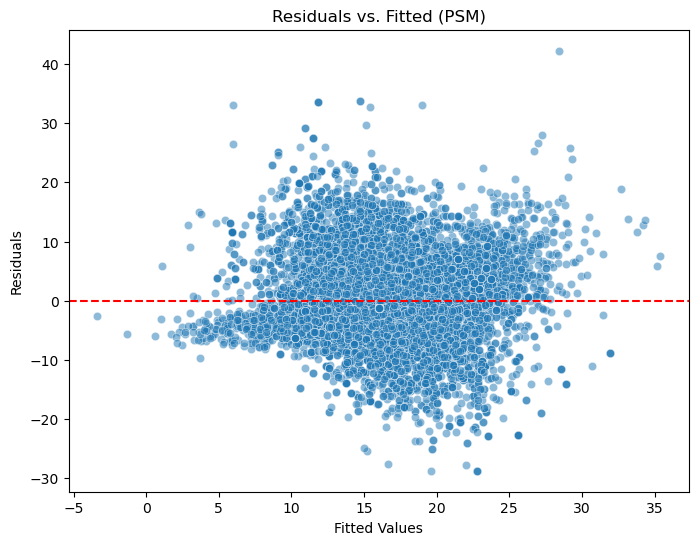

In [153]:
fitted_vals = ols2.predict()
residuals = ols2.resid

plt.figure(figsize=(8, 6))
sns.scatterplot(x = fitted_vals, y = residuals, alpha = 0.5)
plt.axhline(y = 0, linestyle = '--', color = 'red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted (PSM)')
plt.show()

## Ridge Regression with (PSM)

In [154]:
ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(X2, y2)

print(f"Intercept: {ridge_model.intercept_}")

print("Coefficients:")
for feature, coef in zip(X2.columns, ridge_model.coef_):
    print(f"{feature}: {coef}")

Intercept: -0.0065772169622349
Coefficients:
const: 0.0
treatment: 0.9033727591843655
avgFairwayHits: -0.20668971522650226
avgGir: -1.0948073116040034
avgPuttsPerHole: 12.884420992975963
avgUpAndDownPercentage: -0.03517851497275138
time_dummy: 0.7253776156589586
interaction: -0.7876973760512959


In [155]:
predictions2 = ridge_model.predict(X2)

mse2 = mean_squared_error(y2, predictions2)
rsq2 = r2_score(y2, predictions2)

print("Mean Squared Error:", mse2)
print("R-squared:", rsq2)

Mean Squared Error: 40.36520585329026
R-squared: 0.2695210671329409


Ridge regression results are similar to that of the linear regression performed with the treatment and synthetic control groups.

Above analysis is the Ridge regression used to confirm the findings from the linear regression using OLS method with stricter penalties on highly correlated varibles to address multicolinearity issues. The results from ridge regression are similar to that of the linear regression results from OLS.

## Random Forest Regressor

In [156]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [157]:
combined_rf = combined.drop(['interaction'], axis = 1)
combined_rf

,treatment,avgToPar,avgFairwayHits,avgGir,avgPuttsPerHole,avgUpAndDownPercentage,time_dummy
0,1,16.000000,9.666667,6.000000,1.851852,35.269360,0
1,1,22.633333,4.866667,3.966667,2.024074,19.289100,0
2,1,4.000000,6.333333,9.666667,1.740741,35.185185,0
3,1,26.666667,5.666667,2.000000,2.055556,26.785714,0
4,1,1.333333,10.666667,13.000000,1.851852,36.666667,0
...,...,...,...,...,...,...,...
7495,0,12.579701,7.893632,4.786461,1.872131,11.768846,0
7496,0,6.973908,6.348025,6.705010,1.803143,27.855501,1
7497,0,8.714269,5.493414,3.667747,1.927079,38.685735,1
7498,0,14.837995,6.057867,4.623386,1.746018,3.680504,0


In [158]:
X_rf = combined_rf.drop('avgToPar', axis = 1)
y_rf = combined_rf['avgToPar']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size = 0.2, random_state = 5)

#### Codeblock below is commented out to avoid time consuming of running the code 

In [ ]:
# # Random Forest Regressor hyperparameter grid

# # Set parameters
# param_grid = [    
#     {'n_estimators' : [300,600,900,1200,1500,1800,2100,2500],
#      'max_features': ['auto', 'sqrt', 'log2'],
#      'max_depth': [None, 3, 10, 20, 30],
#      'min_samples_split': [2, 5, 10]
#     }
# ]

# # Create a Random Forest Regressor
# rf = RandomForestRegressor(random_state = 5)

# # Create a custom scorer using f1_score
# mse_scorer = make_scorer(mean_squared_error, greater_is_better = False)

# # Create the grid search object
# grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = mse_scorer, cv = 5)

# # Perform the grid search on the training data
# grid_search_rf.fit(X_train, y_train)

# # Get the best parameters and the corresponding score
# best_params = grid_search_rf.best_params_
# best_score = grid_search_rf.best_score_

# # Print the best parameters and score
# print("Best Parameters: ", best_params)
# print("Best Score (MSE): ", best_score)

In [165]:
rf_best = RandomForestRegressor(max_depth = None, max_features = "sqrt", min_samples_split = 2, n_estimators = 2100, random_state = 5)
rf_best.fit(X_train, y_train)
predictions = rf_best.predict(X_test)
mse_rf = mean_squared_error(y_test, predictions)
r2_rf = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse_rf}")
print(f"R2: {r2_rf}")

Mean Squared Error: 18.252673319514294
R2: 0.6494683400345325


In [162]:
feature_importances = pd.DataFrame(rf_best.feature_importances_,
                                   index = X_train.columns,
                                   columns = ['importance']).sort_values('importance', ascending = False)
print(feature_importances)

                        importance
avgGir                    0.328066
avgPuttsPerHole           0.236369
avgUpAndDownPercentage    0.182575
avgFairwayHits            0.156214
treatment                 0.081221
time_dummy                0.015555


The results derived from Random Forest Regression feature importance calculation shows that green in regulation and putts per hole are the two most impactful metrics for improving a golfer's handicap. This confirms my initial findings from the correlation heatmap that GIR and putts per hold metrics are the two most correlated metrics for a player's average score to par. Treatment is one of the least important features in predicting a player's average score to par.

## Summary of Results

In conclusion, the results derived from data and statistical analysis fails to reject the null hypothesis that the treatment (uptake of the premium features) does not improve a player's average score to par. This outcome suggests that while the premium features may add value in other ways, such as user experience or engagement, they do not directly correlate with the core metric of golf performance improvement. It is advisable for the development team to revisit the feature set and possibly re-align the offerings to more directly impact user performance, or to adjust marketing strategies to highlight different benefits. The results from the random forest regression feature importance highlights that the two most impactful metrics on players' average score to par are average green in regulation and average putts per hole.